# Claude

**Note:**
<div class="alert alert-block alert-info">

1. This notebook presents the output of Claude with little to no human assistance. Intervention is only introduced to ensure code is able to run and proceed to the next stage.
2. Boxes highlighted in yellow indicates warning. This indicates the step where we think the LLM produces a somewhat problematic output, or misses out on important thought process. Some minor modifications may be made to the LLM output to ensure the code proceeds to run.

**Prompt:**
<div class="alert alert-block alert-info">
Here is the dataset hotel_reservation.csv

`import`
</div>

**Note:**
<div class="alert alert-warning">

1. The above is the prompt for GPT4 for which we are able to upload the full dataset.
2. For Gemini Advanced and Claude, we upload the first 20 rows of data due to the limitation. Although we are aware that by using third party provider such as `poe.com` would allow us to potentially upload dataset, we decide to stick with the official LLM website `https://gemini.google.com/` and `https://claude.ai/`
</div>

**Prompt:**
<div class="alert alert-block alert-info">
Before we proceed, let me share the metadata for the dataset. The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below. The goal is to build a classification model with the target variable being booking_status.
</div>

#### Dataset Source:
   https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

   #### DBA4714 Deep Learning and Generative AI in Business
   Revenue Management in Hotel Reservations

   #### Problem Statement
   The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below.

   #### Train data:
| No. | Features | Description |
| :-------- | :-------- | :-------- |
| 1. | Booking_ID | Unique identifier of each booking |
| 2. | no_of_adults | Number of adults |
| 3. | no_of_children | Number of Children |
| 4. | no_of_weekend_nights | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
| 5. | no_of_week_nights | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
| 6. | type_of_meal_plan | Type of meal plan booked by the customer |
| 7. | required_car_parking_space | Does the customer require a car parking space? (0 - No, 1- Yes) |
| 8. | room_type_reserved | Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels. |
| 9. | lead_time | Number of days between the date of booking and the arrival date |
| 10. | arrival_year | Year of arrival date |
| 11. | arrival_month | Month of arrival date |
| 12. | arrival_date | Date of the month |
| 13. | market_segment_type | Market segment designation |
| 14. | repeated_guest | Is the customer a repeated guest? (0 - No, 1- Yes) |
| 15. | no_of_previous_cancellations | Number of previous bookings that were canceled by the customer prior to the current bookinge |
| 16. | no_of_previous_bookings_not_canceled | Number of previous bookings not canceled by the customer prior to the current booking |
| 17. | avg_price_per_room | Average price per day of the reservation; prices of the rooms are dynamic. (in euros) |
| 18. | no_of_special_requests | Total number of special requests made by the customer (e.g. high floor, view from the room, etc) |
| 19. | booking_status | Flag indicating if the booking was canceled or not |

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Load the dataset
data = pd.read_csv('../../data/raw/hotel_reservations.csv')

# Display the first few rows
print(data.head())

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

**Prompt:**
<div class="alert alert-block alert-info">
There are faulty dates 29 February 2018 in the dataset. Help me drop these rows.

**Note:**
<div class="alert alert-warning">

1. The LLM is unable to point out this data error as only 20 rows of data are provided. Hence, it assumes correct and provides no further validation.
2. This errors out at the later stage of the model building, in particular when dealing with datetime.
3. We iterate a few times and pick up this data error manually through prior experience in data cleaning. Then, we explicitly prompt the LLM to remove observations with this error.
</div>

In [2]:
# Create a boolean mask to identify rows with faulty dates
faulty_dates = (data['arrival_year'] == 2018) & (data['arrival_month'] == 2) & (data['arrival_date'] == 29)

# Drop rows with faulty dates
data = data[~faulty_dates]

# Confirm the faulty rows are removed
print(data[(data['arrival_year'] == 2018) & (data['arrival_month'] == 2) & (data['arrival_date'] == 29)])

Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []


**Prompt:**
<div class="alert alert-block alert-info">

Perform train test split on my hotel data with test size 0.2 and stratify the target.
</div>

In [3]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = data.drop('booking_status', axis=1)
y = data['booking_status']

# Encode the target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (28990, 18)
X_test shape: (7248, 18)
y_train shape: (28990,)
y_test shape: (7248,)


The code below for feature engineering uses data but we want to work on the X_train and X_test datapoints


In [4]:
#import pandas as pd
#import numpy as np

# Extract datetime features
#data['arrival_month'] = pd.to_datetime(data['arrival_date'], format='%Y-%m-%d').dt.month
#data['arrival_day'] = pd.to_datetime(data['arrival_date'], format='%Y-%m-%d').dt.day
#data['arrival_day_of_week'] = pd.to_datetime(data['arrival_date'], format='%Y-%m-%d').dt.day_name()
#data['is_weekend_arrival'] = np.where(data['arrival_day_of_week'].isin(['Saturday', 'Sunday']), 1, 0)

# Create duration features
#data['total_nights'] = data['no_of_weekend_nights'] + data['no_of_week_nights']
#data['stay_duration_category'] = pd.cut(data['total_nights'], bins=[-1, 3, 7, np.inf], labels=['short', 'medium', 'long'])

# One-hot encode categorical features
#data = pd.get_dummies(data, columns=['type_of_meal_plan', 'room_type_reserved'])

# Create guest type feature
#data['guest_type'] = np.where(data['no_of_adults'] == 1, 'solo', np.where(data['no_of_children'] == 0, 'couple', 'family'))

# ... (continue with other feature engineering steps) 

**Prompt:**
<div class="alert alert-block alert-info">
Now I would like you to start doing feature engineering on the dataset.

Recommend new feature creation as part of the feature engineering process.
</div>

In [5]:
import pandas as pd
import numpy as np

# Create date_combined feature
X_train['date_combined'] = pd.to_datetime(
    X_train['arrival_year'].astype(str) + '-' + X_train['arrival_month'].astype(str) + '-' + X_train['arrival_date'].astype(str),
    format='%Y-%m-%d'
)
X_test['date_combined'] = pd.to_datetime(
    X_test['arrival_year'].astype(str) + '-' + X_test['arrival_month'].astype(str) + '-' + X_test['arrival_date'].astype(str),
    format='%Y-%m-%d'
)

# Create is_weekend_arrival feature
X_train['is_weekend_arrival'] = X_train['date_combined'].dt.day_name().isin(['Saturday', 'Sunday']).astype(int)
X_test['is_weekend_arrival'] = X_test['date_combined'].dt.day_name().isin(['Saturday', 'Sunday']).astype(int)

# Create quarter feature
X_train['quarter'] = X_train['date_combined'].dt.quarter
X_test['quarter'] = X_test['date_combined'].dt.quarter

# Create lead_time_category feature
bins = [-1, 90, 180, np.inf]
labels = ['Within 3 months', 'Within 6 months', 'Beyond 6 months']
X_train['lead_time_category'] = pd.cut(X_train['lead_time'], bins=bins, labels=labels)
X_test['lead_time_category'] = pd.cut(X_test['lead_time'], bins=bins, labels=labels)

# Create total_people feature
X_train['total_people'] = X_train['no_of_adults'] + X_train['no_of_children']
X_test['total_people'] = X_test['no_of_adults'] + X_test['no_of_children']

# Create is_alone feature
X_train['is_alone'] = np.where(X_train['total_people'] == 1, 1, 0)
X_test['is_alone'] = np.where(X_test['total_people'] == 1, 1, 0)

# Create total_nights_stay feature
X_train['total_nights_stay'] = X_train['no_of_weekend_nights'] + X_train['no_of_week_nights']
X_test['total_nights_stay'] = X_test['no_of_weekend_nights'] + X_test['no_of_week_nights']

# Drop the date_combined feature
X_train = X_train.drop('date_combined', axis=1)
X_test = X_test.drop('date_combined', axis=1)

In [6]:
X_train

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,is_weekend_arrival,quarter,lead_time_category,total_people,is_alone,total_nights_stay
10409,INN10410,2,0,0,2,Not Selected,0,Room_Type 1,68,2018,3,11,Online,0,0,0,67.50,1,1,1,Within 3 months,2,0,2
6307,INN06308,2,1,0,3,Meal Plan 1,0,Room_Type 1,149,2018,7,20,Online,0,0,0,127.50,0,0,3,Within 6 months,3,0,3
19004,INN19005,2,0,0,3,Meal Plan 1,0,Room_Type 1,72,2018,3,31,Online,0,0,0,67.22,0,1,1,Within 3 months,2,0,3
9609,INN09610,2,0,0,3,Meal Plan 1,0,Room_Type 1,259,2018,5,5,Offline,0,0,0,90.00,0,1,2,Beyond 6 months,2,0,3
32308,INN32309,2,0,2,0,Meal Plan 1,1,Room_Type 1,47,2017,12,6,Online,0,0,0,115.20,1,0,4,Within 3 months,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,INN18284,1,0,0,1,Not Selected,0,Room_Type 1,0,2018,8,20,Online,0,0,0,92.17,0,0,3,Within 3 months,1,1,1
7308,INN07309,2,0,0,1,Not Selected,0,Room_Type 1,143,2018,8,20,Online,0,0,0,94.50,0,0,3,Within 6 months,2,0,1
22902,INN22903,1,0,3,7,Meal Plan 1,0,Room_Type 1,29,2018,4,15,Online,0,0,0,99.49,1,1,2,Within 3 months,1,1,10
20224,INN20225,2,1,1,3,Meal Plan 1,0,Room_Type 1,83,2018,8,1,Online,0,0,0,135.90,1,0,3,Within 3 months,3,0,4


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28990 entries, 10409 to 5622
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            28990 non-null  object  
 1   no_of_adults                          28990 non-null  int64   
 2   no_of_children                        28990 non-null  int64   
 3   no_of_weekend_nights                  28990 non-null  int64   
 4   no_of_week_nights                     28990 non-null  int64   
 5   type_of_meal_plan                     28990 non-null  object  
 6   required_car_parking_space            28990 non-null  int64   
 7   room_type_reserved                    28990 non-null  object  
 8   lead_time                             28990 non-null  int64   
 9   arrival_year                          28990 non-null  int64   
 10  arrival_month                         28990 non-null  int64   
 11  arri

**Prompt:**
<div class="alert alert-block alert-info">

1. Please encode categorical variables on the following columns: [`type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, `lead_time_category`, `arrival_weekday`]. Recommend and apply appropriate encoding techniques for each variable.

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Label Encoding for ordinal variables
label_encoder = LabelEncoder()

# 'lead_time_category' can be treated as an ordinal variable
X_train['lead_time_category'] = label_encoder.fit_transform(X_train['lead_time_category'])
X_test['lead_time_category'] = label_encoder.transform(X_test['lead_time_category'])

# One-Hot Encoding for nominal variables
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type' are nominal variables
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

# Fit the one-hot encoder on the training data
one_hot_encoder.fit(X_train[categorical_cols])

# Transform the training and test data
X_train_encoded = one_hot_encoder.transform(X_train[categorical_cols]).toarray()
X_test_encoded = one_hot_encoder.transform(X_test[categorical_cols]).toarray()

# Get the column names for the encoded features
encoded_cols = one_hot_encoder.get_feature_names_out(categorical_cols)

# Create a DataFrame with the encoded features
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

# Combine the encoded features with the rest of the features
X_train_encoded = pd.concat([X_train, X_train_encoded], axis=1)
X_test_encoded = pd.concat([X_test, X_test_encoded], axis=1)

# Drop the original categorical columns
X_train_encoded = X_train_encoded.drop(categorical_cols, axis=1)
X_test_encoded = X_test_encoded.drop(categorical_cols, axis=1)

**Prompt:**
<div class="alert alert-block alert-info">

1. Please perform scaling of numerical variables on the following columns: [`lead_time`, `avg_price_per_room`]. Recommend and apply appropriate scaling techniques for each variable.
</div>

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler for 'lead_time'
std_scaler = StandardScaler()
X_train_encoded['lead_time'] = std_scaler.fit_transform(X_train_encoded[['lead_time']])
X_test_encoded['lead_time'] = std_scaler.transform(X_test_encoded[['lead_time']])

# MinMaxScaler for 'avg_price_per_room'
min_max_scaler = MinMaxScaler()
X_train_encoded['avg_price_per_room'] = min_max_scaler.fit_transform(X_train_encoded[['avg_price_per_room']])
X_test_encoded['avg_price_per_room'] = min_max_scaler.transform(X_test_encoded[['avg_price_per_room']])

In [10]:
X_train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,is_weekend_arrival,quarter,lead_time_category,total_people,is_alone,total_nights_stay
10409,INN10410,2,0,0,2,Not Selected,0,Room_Type 1,68,2018,3,11,Online,0,0,0,67.50,1,1,1,1,2,0,2
6307,INN06308,2,1,0,3,Meal Plan 1,0,Room_Type 1,149,2018,7,20,Online,0,0,0,127.50,0,0,3,2,3,0,3
19004,INN19005,2,0,0,3,Meal Plan 1,0,Room_Type 1,72,2018,3,31,Online,0,0,0,67.22,0,1,1,1,2,0,3
9609,INN09610,2,0,0,3,Meal Plan 1,0,Room_Type 1,259,2018,5,5,Offline,0,0,0,90.00,0,1,2,0,2,0,3
32308,INN32309,2,0,2,0,Meal Plan 1,1,Room_Type 1,47,2017,12,6,Online,0,0,0,115.20,1,0,4,1,2,0,2


In [11]:
X_train_encoded.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,is_weekend_arrival,quarter,lead_time_category,total_people,is_alone,total_nights_stay,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
10409,INN10410,2,0,0,2,0,-0.201827,2018,3,11,0,0,0,0.125000,1,1,1,1,2,0,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6307,INN06308,2,1,0,3,0,0.738327,2018,7,20,0,0,0,0.236111,0,0,3,2,3,0,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19004,INN19005,2,0,0,3,0,-0.155400,2018,3,31,0,0,0,0.124481,0,1,1,1,2,0,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9609,INN09610,2,0,0,3,0,2.015079,2018,5,5,0,0,0,0.166667,0,1,2,0,2,0,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32308,INN32309,2,0,2,0,1,-0.445571,2017,12,6,0,0,0,0.213333,1,0,4,1,2,0,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Note:**
<div class="alert alert-block alert-info">
Getting the Base Model Performance

</div>

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Drop the 'Booking_ID' column from X_train and X_test
X_train_encoded = X_train_encoded.drop('Booking_ID', axis=1)
X_test_encoded = X_test_encoded.drop('Booking_ID', axis=1)

# Train a logistic regression model
base_model = LogisticRegression()
base_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = base_model.predict(X_test_encoded)
y_prob = base_model.predict_proba(X_test_encoded)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

Accuracy: 0.7882174392935982
Precision: 0.8116943769848683
Recall: 0.8918308702791461
F1 Score: 0.8498777506112469
ROC AUC: 0.8498458258695327


/Users/andreaslukita7/Data/DSA_ML/Python/Analysis/hotel_reservation/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Prompt:**
<div class="alert alert-block alert-info">
Help me to explode the feature space by considering feature interactions and polynomial terms. Start small by considering only feature interactions first.

</div>

In [13]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Assuming you have already split the data into X_train and X_test

# Create a list of the relevant features for interactions
# You can choose the features based on your domain knowledge or feature importance
relevant_features = ['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time']

# Create feature interactions using PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Fit and transform the training data
X_train_poly = poly.fit_transform(X_train_encoded[relevant_features])

# Transform the test data using the same transformation
X_test_poly = poly.transform(X_test_encoded[relevant_features])

# Get the names of the new features
new_feature_names = poly.get_feature_names_out(input_features=relevant_features)

# Create a DataFrame with the new features
X_train_poly = pd.DataFrame(X_train_poly, columns=new_feature_names, index=X_train_encoded.index)
X_test_poly = pd.DataFrame(X_test_poly, columns=new_feature_names, index=X_test_encoded.index)

# Combine the new features with the original features
X_train_combined = pd.concat([X_train_encoded, X_train_poly], axis=1)
X_test_combined = pd.concat([X_test_encoded, X_test_poly], axis=1)

**Prompt:**
<div class="alert alert-block alert-info">
Now I would like to have feature selection. Please choose to include only influential features in model building. Recommend some ways in which feature selection can be done.

</div>

In [14]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Create the RFECV estimator
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the RFECV estimator to the training data
rfecv.fit(X_train_combined, y_train)

# Get the ranking of features
ranking = rfecv.ranking_

# Select the top features based on the ranking
top_features = X_train_combined.columns[ranking == 1]

# Create new feature sets with the selected features
X_train_selected = X_train_combined[top_features]
X_test_selected = X_test_combined[top_features]

/Users/andreaslukita7/Data/DSA_ML/Python/Analysis/hotel_reservation/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andreaslukita7/Data/DSA_ML/Python/Analysis/hotel_reservation/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for a

In [15]:
X_train

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,is_weekend_arrival,quarter,lead_time_category,total_people,is_alone,total_nights_stay
10409,INN10410,2,0,0,2,Not Selected,0,Room_Type 1,68,2018,3,11,Online,0,0,0,67.50,1,1,1,1,2,0,2
6307,INN06308,2,1,0,3,Meal Plan 1,0,Room_Type 1,149,2018,7,20,Online,0,0,0,127.50,0,0,3,2,3,0,3
19004,INN19005,2,0,0,3,Meal Plan 1,0,Room_Type 1,72,2018,3,31,Online,0,0,0,67.22,0,1,1,1,2,0,3
9609,INN09610,2,0,0,3,Meal Plan 1,0,Room_Type 1,259,2018,5,5,Offline,0,0,0,90.00,0,1,2,0,2,0,3
32308,INN32309,2,0,2,0,Meal Plan 1,1,Room_Type 1,47,2017,12,6,Online,0,0,0,115.20,1,0,4,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,INN18284,1,0,0,1,Not Selected,0,Room_Type 1,0,2018,8,20,Online,0,0,0,92.17,0,0,3,1,1,1,1
7308,INN07309,2,0,0,1,Not Selected,0,Room_Type 1,143,2018,8,20,Online,0,0,0,94.50,0,0,3,2,2,0,1
22902,INN22903,1,0,3,7,Meal Plan 1,0,Room_Type 1,29,2018,4,15,Online,0,0,0,99.49,1,1,2,1,1,1,10
20224,INN20225,2,1,1,3,Meal Plan 1,0,Room_Type 1,83,2018,8,1,Online,0,0,0,135.90,1,0,3,1,3,0,4


In [16]:
X_test

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,is_weekend_arrival,quarter,lead_time_category,total_people,is_alone,total_nights_stay
31719,INN31720,2,1,2,4,Meal Plan 1,0,Room_Type 1,132,2018,7,14,Online,0,0,0,114.75,0,1,3,2,3,0,6
22776,INN22777,2,0,2,5,Meal Plan 2,0,Room_Type 1,3,2017,9,14,Offline,0,0,0,90.00,0,0,3,1,2,0,7
15869,INN15870,3,0,2,2,Meal Plan 1,0,Room_Type 4,10,2018,4,29,Online,0,0,0,172.00,2,1,2,1,3,0,4
11331,INN11332,2,0,1,1,Meal Plan 1,0,Room_Type 5,28,2018,10,8,Online,0,0,0,171.87,0,0,4,1,2,0,2
13639,INN13640,1,0,2,5,Meal Plan 1,0,Room_Type 1,7,2018,11,2,Corporate,1,0,2,65.00,1,0,4,1,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7261,INN07262,1,0,1,2,Meal Plan 1,0,Room_Type 4,3,2018,10,7,Aviation,0,0,0,110.00,0,1,4,1,1,1,3
395,INN00396,2,1,2,3,Meal Plan 1,0,Room_Type 1,25,2018,7,23,Online,0,0,0,152.10,1,0,3,1,3,0,5
18846,INN18847,1,0,0,2,Meal Plan 1,0,Room_Type 4,17,2018,3,9,Corporate,0,0,0,75.00,0,0,1,1,1,1,2
22540,INN22541,3,0,1,2,Meal Plan 2,0,Room_Type 4,109,2018,10,28,Online,0,0,0,174.60,1,1,4,2,3,0,3


**Prompt:**
<div class="alert alert-block alert-info">
Can you help me to wrap all the processes above in a Pipeline and ColumnTransformer if necessary.

</div>

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

# Define the preprocessing steps for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create the ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['lead_time', 'avg_price_per_room']),
        ('cat', categorical_transformer, ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])
    ])

# Define the pipeline
estimators = [
    ('preprocessor', preprocessor),
    ('feature_selection', RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='roc_auc', n_jobs=-1)),
    ('classifier', LogisticRegression())
]

pipeline = Pipeline(estimators)

# Fit the pipeline to the training data
pipeline.fit(X_train.drop(columns=['Booking_ID']), y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test.drop(columns=['Booking_ID']))

In [18]:
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [19]:
# Define the pipeline
estimators = [
    ('preprocessor', preprocessor),
    ('feature_selection', RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='roc_auc', n_jobs=-1)),
]

pipeline = Pipeline(estimators)
X_train_transformed = pipeline.fit_transform(X_train.drop(columns=['Booking_ID']), y_train)
X_test_transformed = pipeline.transform(X_test.drop(columns=['Booking_ID']))

**Prompt:**
<div class="alert alert-block alert-info">
I am done with the Logistic Regression model. Can we explore other models like XGBoost and SVC?

</div>

In [20]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_transformed, y_train)
lr_pred = lr_model.predict(X_test_transformed)
lr_prob = lr_model.predict_proba(X_test_transformed)[:, 1]

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_roc_auc = roc_auc_score(y_test, lr_prob)

print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)
print("ROC-AUC:", lr_roc_auc)
print(classification_report(y_test, lr_pred))
print("\n")

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train_transformed, y_train)
xgb_pred = xgb_model.predict(X_test_transformed)
xgb_prob = xgb_model.predict_proba(X_test_transformed)[:, 1]

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_prob)

print("XGBoost:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1-score:", xgb_f1)
print("ROC-AUC:", xgb_roc_auc)
print(classification_report(y_test, xgb_pred))
print("\n")

# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train_transformed, y_train)
svc_pred = svc_model.predict(X_test_transformed)
svc_prob = svc_model.decision_function(X_test_transformed)

svc_accuracy = accuracy_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred)
svc_roc_auc = roc_auc_score(y_test, svc_prob)

print("Support Vector Classifier:")
print("Accuracy:", svc_accuracy)
print("Precision:", svc_precision)
print("Recall:", svc_recall)
print("F1-score:", svc_f1)
print("ROC-AUC:", svc_roc_auc)
print(classification_report(y_test, svc_pred))

Logistic Regression:
Accuracy: 0.7622792494481236
Precision: 0.7791171778053536
Recall: 0.9020935960591133
F1-score: 0.8361076762104062
ROC-AUC: 0.792603183587379
              precision    recall  f1-score   support

           0       0.70      0.48      0.57      2376
           1       0.78      0.90      0.84      4872

    accuracy                           0.76      7248
   macro avg       0.74      0.69      0.70      7248
weighted avg       0.75      0.76      0.75      7248



XGBoost:
Accuracy: 0.8228476821192053
Precision: 0.8172974885037142
Recall: 0.9484811165845649
F1-score: 0.8780163404902147
ROC-AUC: 0.8819919138705058
              precision    recall  f1-score   support

           0       0.84      0.57      0.68      2376
           1       0.82      0.95      0.88      4872

    accuracy                           0.82      7248
   macro avg       0.83      0.76      0.78      7248
weighted avg       0.83      0.82      0.81      7248



Support Vector Classifier:


**Prompt:**
<div class="alert alert-block alert-info">
Let’s visualise the model performance using ConfusionMatrixDisplay, Precision Recall Curve and ROC AUC curve.

</div>

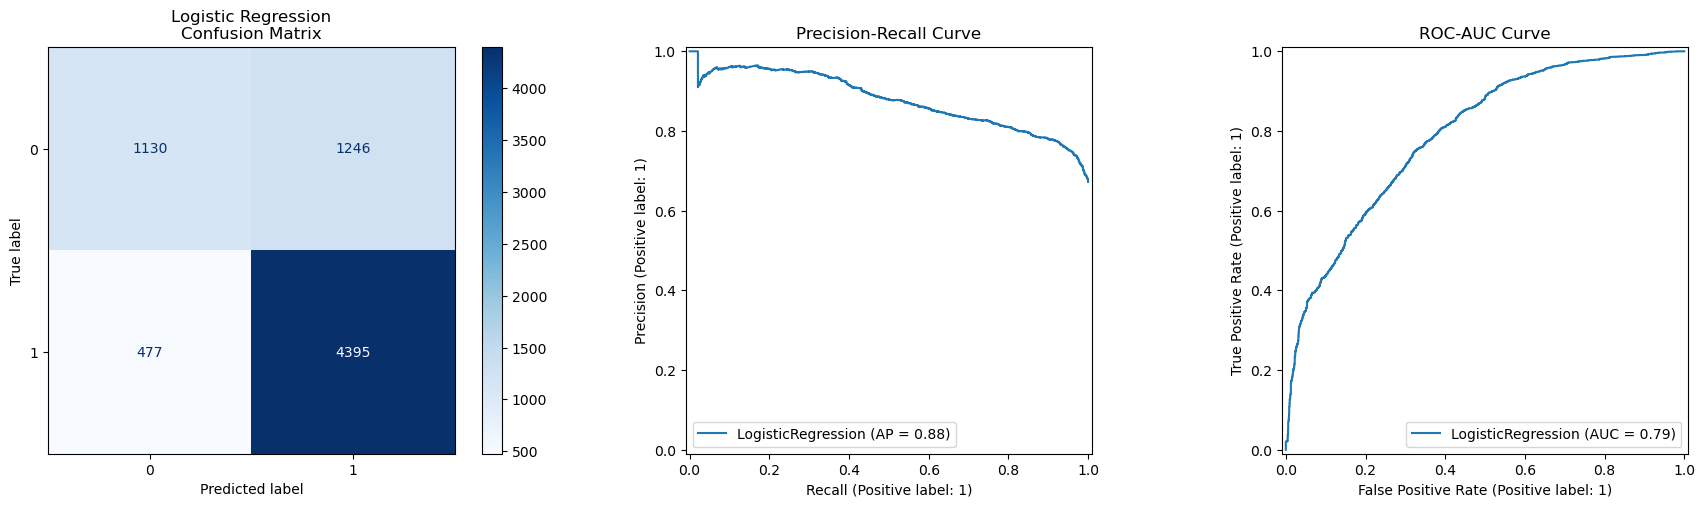

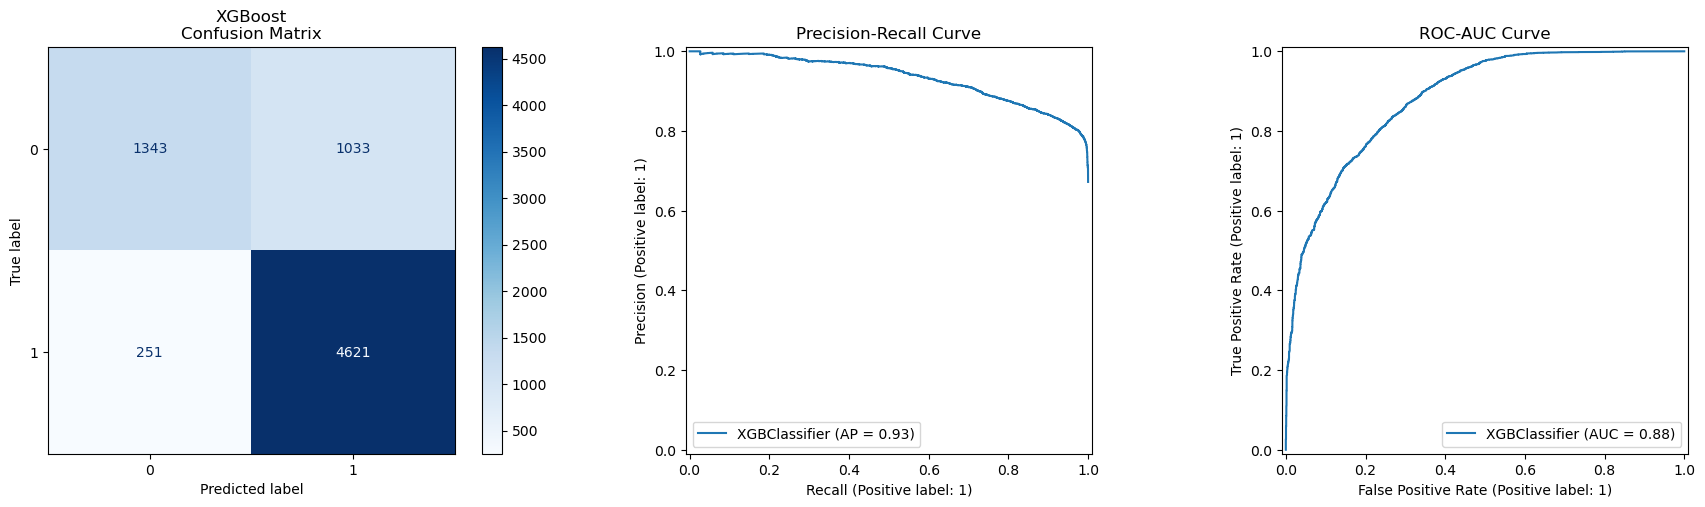

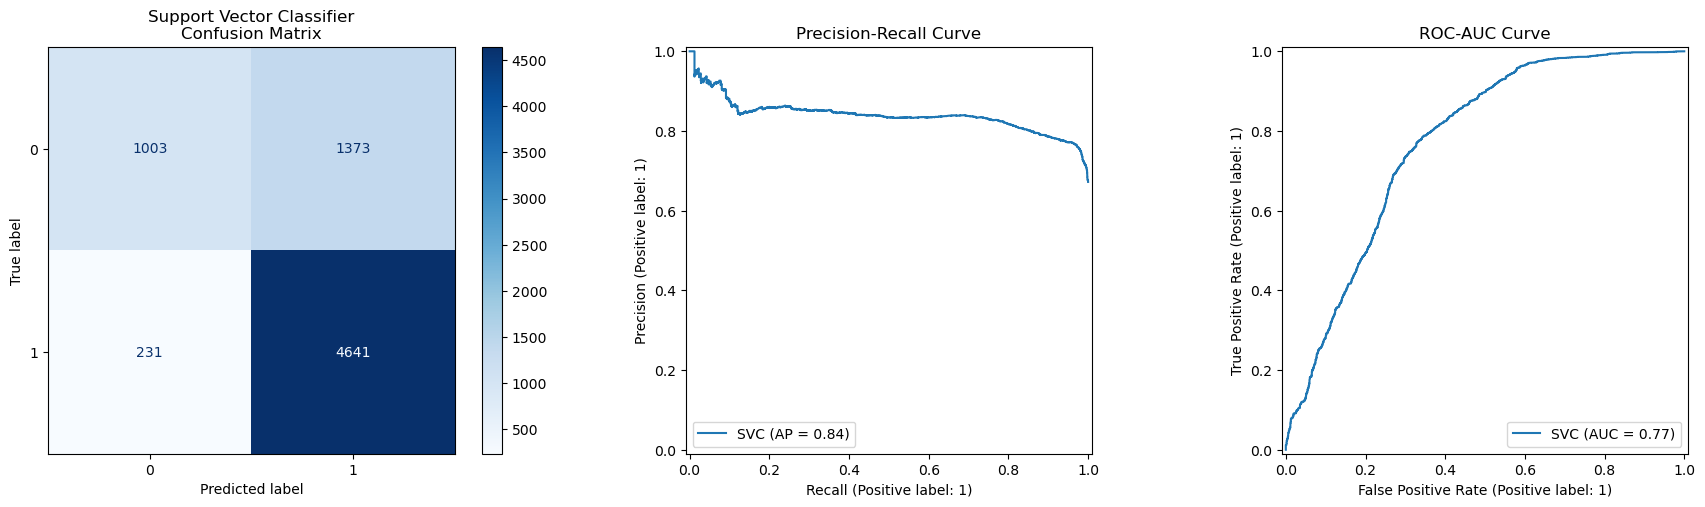

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

# Logistic Regression
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(lr_model, X_test_transformed, y_test, ax=ax1, cmap=plt.cm.Blues)
ax1.set_title('Logistic Regression\nConfusion Matrix')

# Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(lr_model, X_test_transformed, y_test, ax=ax2)
ax2.set_title('Precision-Recall Curve')

# ROC-AUC Curve
RocCurveDisplay.from_estimator(lr_model, X_test_transformed, y_test, ax=ax3)
ax3.set_title('ROC-AUC Curve')

plt.tight_layout()
plt.show()

# XGBoost
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_transformed, y_test, ax=ax1, cmap=plt.cm.Blues)
ax1.set_title('XGBoost\nConfusion Matrix')

# Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(xgb_model, X_test_transformed, y_test, ax=ax2)
ax2.set_title('Precision-Recall Curve')

# ROC-AUC Curve
RocCurveDisplay.from_estimator(xgb_model, X_test_transformed, y_test, ax=ax3)
ax3.set_title('ROC-AUC Curve')

plt.tight_layout()
plt.show()

# SVC
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svc_model, X_test_transformed, y_test, ax=ax1, cmap=plt.cm.Blues)
ax1.set_title('Support Vector Classifier\nConfusion Matrix')

# Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(svc_model, X_test_transformed, y_test, ax=ax2)
ax2.set_title('Precision-Recall Curve')

# ROC-AUC Curve
RocCurveDisplay.from_estimator(svc_model, X_test_transformed, y_test, ax=ax3)
ax3.set_title('ROC-AUC Curve')

plt.tight_layout()
plt.show()

**Prompt:**
<div class="alert alert-block alert-info">
Let’s perform hyperparameter tuning to optimise the model performance. Start small by considering only a few combinations of hyperparameters.

</div

**Note:**

1. For Logistic Regression, we can tune the regularization strength (C) and the regularization type (penalty).

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}

# Create a Logistic Regression instance
lr_model = LogisticRegression()

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters for Logistic Regression:", best_params)

# Get the best estimator
best_lr_model = grid_search.best_estimator_

# Evaluate the best model on the test set
lr_pred = best_lr_model.predict(X_test_transformed)
lr_prob = best_lr_model.predict_proba(X_test_transformed)[:, 1]
lr_roc_auc = roc_auc_score(y_test, lr_prob)
print("ROC-AUC score for the best Logistic Regression model:", lr_roc_auc)

Best hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
ROC-AUC score for the best Logistic Regression model: 0.7926249530057


/Users/andreaslukita7/Data/DSA_ML/Python/Analysis/hotel_reservation/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/andreaslukita7/Data/DSA_ML/Python/Analysis/hotel_reservation/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/andreaslukita7/Data/DSA_ML/Python/Analysis/hotel_reservation/.venv/lib/python3.9/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **

**Prompt:**
<div class="alert alert-block alert-info">
Let’s perform hyperparameter tuning to optimise the model performance. Start small by considering only a few combinations of hyperparameters.

</div>

**Note:**

1. For XGBoost, we can tune the maximum depth of the trees (max_depth) and the learning rate (learning_rate).

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Create an XGBClassifier instance
xgb_model = XGBClassifier()

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters for XGBoost:", best_params)

# Get the best estimator
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
xgb_pred = best_xgb_model.predict(X_test_transformed)
xgb_prob = best_xgb_model.predict_proba(X_test_transformed)[:, 1]
xgb_roc_auc = roc_auc_score(y_test, xgb_prob)
print("ROC-AUC score for the best XGBoost model:", xgb_roc_auc)

Best hyperparameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 7}
ROC-AUC score for the best XGBoost model: 0.8849986851962427


**Prompt:**
<div class="alert alert-block alert-info">

Let’s perform hyperparameter tuning to optimise the model performance. Start small by considering only a few combinations of hyperparameters.

</div>

**Note:**

For SVC (Support Vector Classifier), we can tune the kernel type (kernel) and the regularization parameter (C).

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

# Create an SVC instance
svc_model = SVC()

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters for SVC:", best_params)

# Get the best estimator
best_svc_model = grid_search.best_estimator_

# Evaluate the best model on the test set
svc_pred = best_svc_model.predict(X_test_transformed)
svc_prob = best_svc_model.decision_function(X_test_transformed)
svc_roc_auc = roc_auc_score(y_test, svc_prob)
print("ROC-AUC score for the best SVC model:", svc_roc_auc)

/Users/andreaslukita7/Data/DSA_ML/Python/Analysis/hotel_reservation/.venv/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters for SVC: {'C': 10, 'kernel': 'linear'}
ROC-AUC score for the best SVC model: 0.7930766684358638


**Prompt:**
<div class="alert alert-block alert-info">
Can you also use Hyperopt to perform hyperparameter tuning?

</div>

In [25]:
import hyperopt
from hyperopt import hp, fmin, tpe, STATUS_OK
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Define the hyperparameter search space
space = {
    'max_depth': hp.quniform('max_depth', 2, 10, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, -1),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 50),
    'gamma': hp.uniform('gamma', 0, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1)
}

# Define the objective function
def objective(params):
    model = XGBClassifier(
        max_depth=int(params['max_depth']),
        learning_rate=params['learning_rate'],
        n_estimators=int(params['n_estimators']),
        gamma=params['gamma'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda'],
        colsample_bytree=params['colsample_bytree'],
        min_child_weight=int(params['min_child_weight'])
    )
    model.fit(X_train_transformed, y_train)
    y_prob = model.predict_proba(X_test_transformed)[:, 1]
    score = roc_auc_score(y_test, y_prob)
    return {'loss': -score, 'status': STATUS_OK}

# Run the hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100)

# Print the best hyperparameters
print("Best hyperparameters:", best)

# Create the model with the best hyperparameters
best_model = XGBClassifier(
    max_depth=int(best['max_depth']),
    learning_rate=best['learning_rate'],
    n_estimators=int(best['n_estimators']),
    gamma=best['gamma'],
    reg_alpha=best['reg_alpha'],
    reg_lambda=best['reg_lambda'],
    colsample_bytree=best['colsample_bytree'],
    min_child_weight=int(best['min_child_weight'])
)

# Fit the best model
best_model.fit(X_train_transformed, y_train)

# Evaluate the best model on the test set
y_prob = best_model.predict_proba(X_test_transformed)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC score for the best XGBoost model:", roc_auc)

100%|██████████| 100/100 [05:06<00:00,  3.07s/trial, best loss: -0.8892278266380278]
Best hyperparameters: {'colsample_bytree': 0.90644849231563, 'gamma': 0.26884561479493196, 'learning_rate': 0.07717002062350763, 'max_depth': 8.0, 'min_child_weight': 1.0, 'n_estimators': 700.0, 'reg_alpha': 0.41096503436603743, 'reg_lambda': 0.7017142253056129}
ROC-AUC score for the best XGBoost model: 0.8892278266380278


In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Create an XGBClassifier instance
xgb_model = XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_transformed)
y_prob = xgb_model.predict_proba(X_test_transformed)[:, 1]

# Calculate evaluation metrics
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_precision = precision_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
xgb_roc_auc = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print("XGBoost:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1-score:", xgb_f1)
print("ROC-AUC:", xgb_roc_auc)
print(classification_report(y_test, y_pred))

XGBoost:
Accuracy: 0.8228476821192053
Precision: 0.8172974885037142
Recall: 0.9484811165845649
F1-score: 0.8780163404902147
ROC-AUC: 0.8819919138705058
              precision    recall  f1-score   support

           0       0.84      0.57      0.68      2376
           1       0.82      0.95      0.88      4872

    accuracy                           0.82      7248
   macro avg       0.83      0.76      0.78      7248
weighted avg       0.83      0.82      0.81      7248



In [27]:
import pandas as pd

model_metrics = {
    'Model': ['Logistic Regression', 'XGBoost', 'Support Vector Classifier (SVC)'],
    'Accuracy': [lr_accuracy, xgb_accuracy, svc_accuracy],
    'Precision': [lr_precision, xgb_precision, svc_precision],
    'Recall': [lr_recall, xgb_recall, svc_recall],
    'F1-Score': [lr_f1, xgb_f1, svc_f1],
    'ROC-AUC': [lr_roc_auc, xgb_roc_auc, svc_roc_auc]
}

summary_table = pd.DataFrame(model_metrics)
print(summary_table)

                             Model  Accuracy  Precision    Recall  F1-Score  \
0              Logistic Regression  0.762279   0.779117  0.902094  0.836108   
1                          XGBoost  0.822848   0.817297  0.948481  0.878016   
2  Support Vector Classifier (SVC)  0.778698   0.771699  0.952586  0.852655   

    ROC-AUC  
0  0.792625  
1  0.881992  
2  0.793077  
